[8.34180347e-01 1.03515466e-01 4.23267857e-02 1.94440506e-02
 5.33350864e-04 2.06098459e-31]


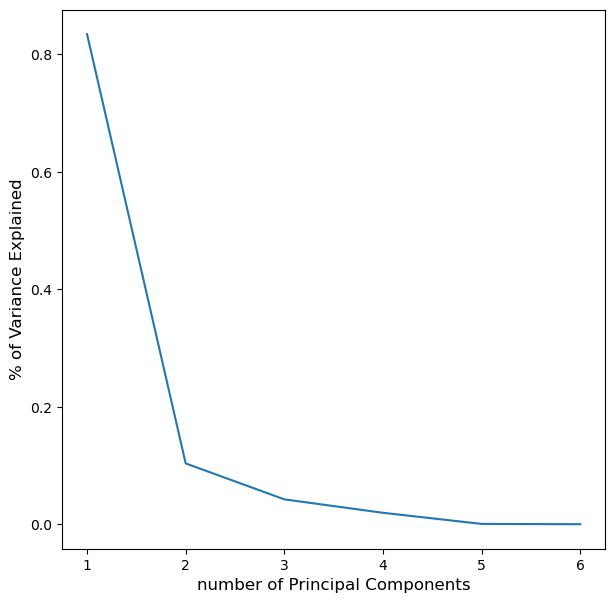

In [11]:
import pandas as pd
df = pd.read_csv("./assembly_report.csv")
del df["Assembly"]
## how to decide the number of Principal Components
from sklearn.decomposition import PCA

pca = PCA(random_state=1004)
pca.fit_transform(df.T)


## percentage of variance explained
print(pca.explained_variance_ratio_)
# [0.92461872 0.05306648 0.01710261 0.00521218]

import matplotlib.pyplot as plt
## Principal 1 & 2 explain about 97.8% of variance
plt.rcParams['figure.figsize'] = (7, 7)
plt.plot(range(1, df.shape[1]+1), pca.explained_variance_ratio_)
plt.xlabel("number of Principal Components", fontsize=12)
plt.ylabel("% of Variance Explained", fontsize=12)
plt.show()

In [12]:
pca = PCA(n_components=2, random_state=1004)
df_pca = pca.fit_transform(df.T)

import numpy as np

df_pca = pd.DataFrame({
    'pc_1': df_pca[:, 0], 
    'pc_2': df_pca[:, 1],
})

In [17]:
df_pca

,pc_1,pc_2
0,-8.147623e+07,-3.201344e+07
1,-1.848846e+08,-6.077587e+07
2,9.799220e+07,-7.620035e+07
3,-1.002181e+08,1.004515e+08
4,-7.925876e+07,4.718157e+07
5,3.478455e+08,2.135660e+07


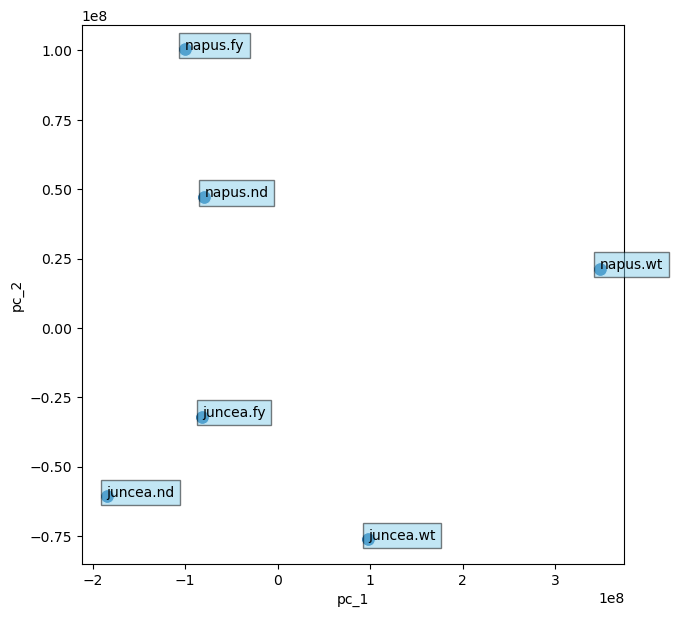

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (7, 7)
sns.scatterplot(
    x='pc_1', 
    y='pc_2',
    s=100,
    data=df_pca
)

for i in range(len(df_pca)):
    plt.text(x=df_pca['pc_1'][i],y=df_pca['pc_2'][i], s = df.T.index[i],
          fontdict=dict(color='black',size=10),
          bbox=dict(facecolor='skyblue',alpha=0.5))